In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import copy
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import seaborn as sns

from src.network import Layer
from src.ou_process import ouprocess_gaussian
from src.experiment import Experiment

sns.set()

In [2]:
NUM_NEURONS = 200
tau_V = 10
R = 1 # MOhm
EL = -70.0
V_th = -40.0
dt = 0.1 # msec
t_stop = 20.0e3

In [3]:
# Slow Signal: INPUT
input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
i_inj = 16.0 + 6.0*input_slow

In [4]:
layer = Layer(NUM_NEURONS)
layer.train(i_inj=i_inj, exp_output=i_inj, dt=dt, t_stop=t_stop)
out, V, F_binary, F_synaptic = layer.output(i_inj, dt, t_stop)

C:\Users\User\Desktop\neural-learning\src\network.py:72: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.W, residuals, rank, s = np.linalg.lstsq(A, exp_output)


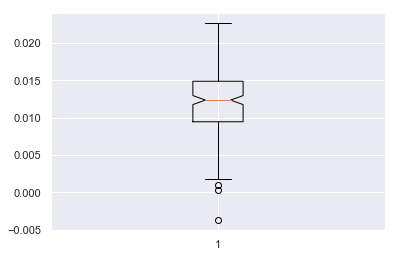

In [5]:
plt.boxplot(layer.W, notch=True, sym="o")
plt.show()

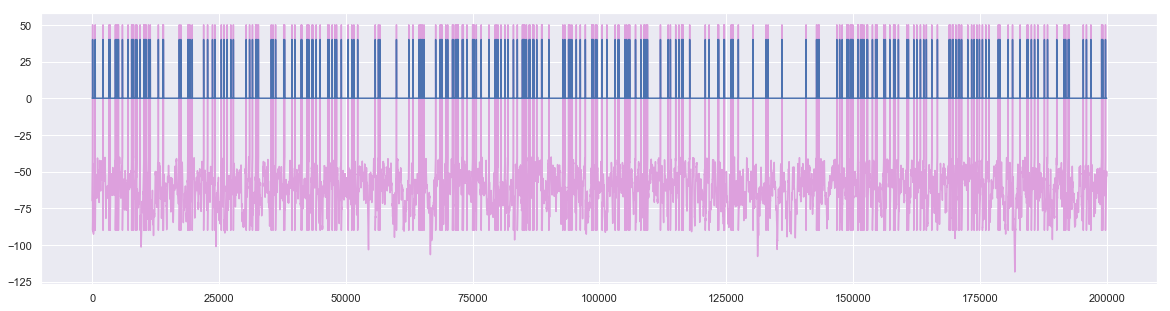

In [6]:
trial = 10
t_i = 0
t_f = -1
plt.figure(figsize=(20,5))
plt.plot(V[t_i:t_f,trial], color='plum')
plt.plot(F_binary[t_i:t_f,trial] * 40.0)
plt.show()

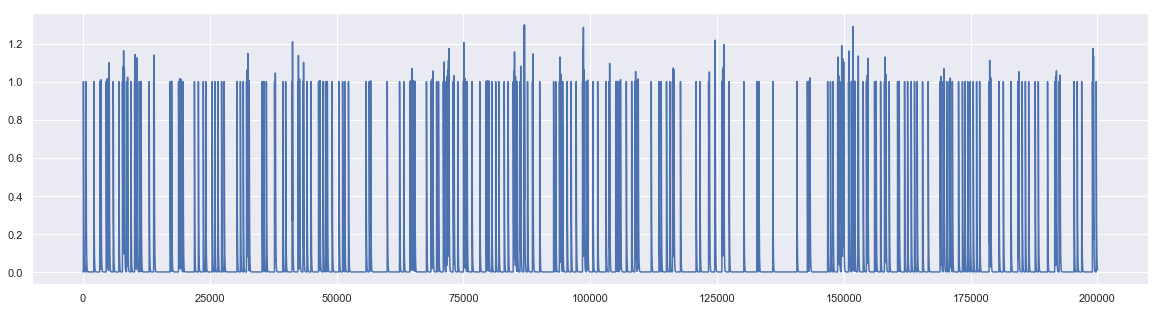

In [7]:
plt.figure(figsize=(20,5))
plt.plot(F_synaptic[:,10])
plt.show()

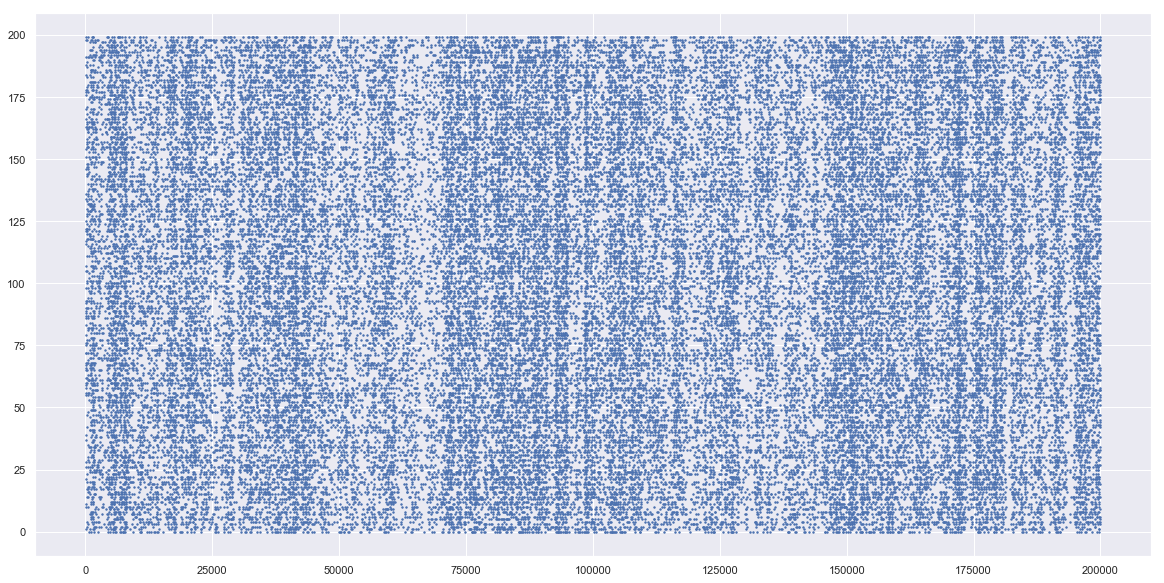

In [8]:
spike_inds, spike_trial = np.where(F_binary > 0)
plt.figure(figsize=(20,10))
plt.scatter(spike_inds, spike_trial, s=2)
plt.show()

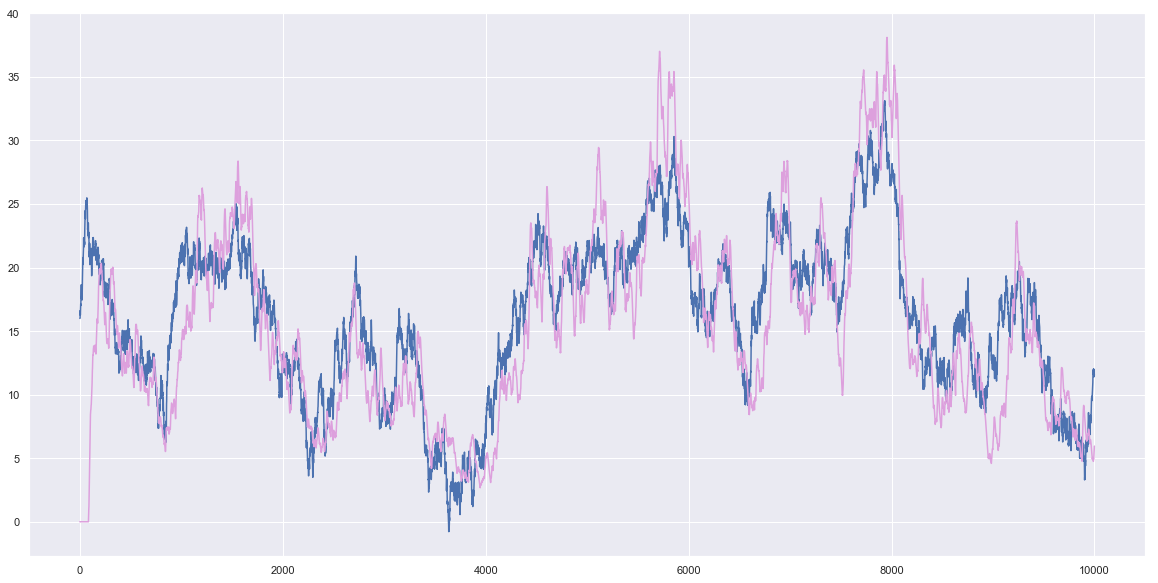

In [9]:
plt.figure(figsize=(20,10))
plt.plot(i_inj[:10000])
plt.plot(out[:10000], 'plum')
plt.show()

In [10]:
np.linalg.norm(out-i_inj)

1703.0046078819348

In [11]:
LOAD_EXP_1 = False
load_exp1_file = "exp1__neurons=200__trials=100__input=tau_50_same.pkl"

if LOAD_EXP_1:
    experiment = pickle.load(open(load_exp1_file, 'rb'))
else:
    NUM_TRIALS = 100

    num_t = np.arange(0.0, t_stop, dt).shape[0]
    inputs = np.empty((num_t, NUM_TRIALS))
    
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    for i in range(NUM_TRIALS):
        inputs[:,i] = i_inj.flatten()

    experiment = Experiment(inputs, layer, NUM_TRIALS, dt, t_stop)
    spikes = experiment.run()
    with open(load_exp1_file, 'wb') as pickle_out:  
        pickle.dump(experiment, pickle_out)

Trial  0
10 Iter time:  15.962188959121704
Total time:  15.962188959121704


Trial  10
10 Iter time:  153.21653127670288
Total time:  169.17872023582458


Trial  20
10 Iter time:  155.439204454422
Total time:  324.6179246902466


Trial  30
10 Iter time:  152.19080233573914
Total time:  476.8087270259857


Trial  40
10 Iter time:  153.80998182296753
Total time:  630.6187088489532


Trial  50
10 Iter time:  150.31883645057678
Total time:  780.93754529953


Trial  60
10 Iter time:  151.23633790016174
Total time:  932.1738831996918


Trial  70
10 Iter time:  149.92951679229736
Total time:  1082.1033999919891


Trial  80
10 Iter time:  148.88946175575256
Total time:  1230.9928617477417


Trial  90
10 Iter time:  159.28272104263306
Total time:  1390.2755827903748


EXPERIMENT FINISHED:  1533.0749697685242


In [13]:
l2_norms = np.empty((experiment.num_trials))

for i in range(experiment.num_trials):
    l2_norms[i] = np.linalg.norm(experiment.outputs[:, i]-experiment.inputs[:, i])

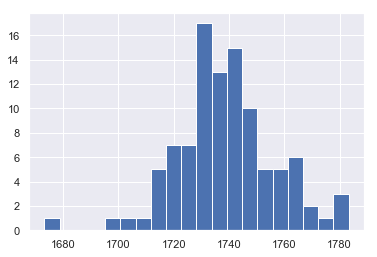

In [14]:
plt.hist(l2_norms, bins=20)
plt.show()

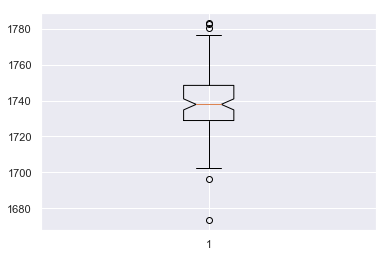

In [15]:
plt.boxplot(l2_norms, notch=True, sym="o")
plt.show()

In [20]:
import time

start_time = time.time()
loop_time = start_time

# How does amount of training data affect the weights?
t_stop_var = 20.0e3

weights_v_training_t = []
training_ts = np.arange(1.0e3, 61.0e3, 10.0e3)

for t_stop_var in training_ts:
    # Slow Signal: INPUT
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop_var, 1)
    i_inj = 16.0 + 6.0*input_slow
    layer_var = Layer(NUM_NEURONS)
    layer_var.train(i_inj=i_inj, exp_output=i_inj, dt=dt, t_stop=t_stop_var)
    
    weights_v_training_t += [layer_var.W]
    
    print("Training data length: ", t_stop_var)
    print("Iter time: ", time.time() - loop_time)
    print("Total time: ", time.time() - start_time)
    print("\n")
    loop_time = time.time()

Training data length:  1000.0
Iter time:  1.1870129108428955
Total time:  1.1870129108428955


Training data length:  11000.0
Iter time:  10.75909686088562
Total time:  11.946109771728516


Training data length:  21000.0
Iter time:  20.906447887420654
Total time:  32.85255765914917


Training data length:  31000.0
Iter time:  31.28421926498413
Total time:  64.1367769241333


Training data length:  41000.0
Iter time:  42.29997277259827
Total time:  106.43674969673157


Training data length:  51000.0
Iter time:  78.60202360153198
Total time:  185.21377182006836




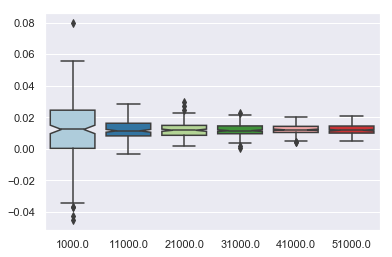

In [30]:
sns.boxplot(x=training_ts, y=weights_v_training_t, notch=True, sym="o", palette="Paired")
plt.show()

In [10]:
LOAD_EXP_3 = True
load_exp1_file = "1000_neurons_200_trials_input=tau_50_regenerated.pkl"

In [11]:
if LOAD_EXP_1:
    experiment = pickle.load(open(load_exp1_file, 'rb'))
else:
    NUM_TRIALS = 200

    num_t = np.arange(0.0, t_stop, dt).shape[0]
    inputs = np.empty((num_t, NUM_TRIALS))

    for i in range(NUM_TRIALS):
        input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
        i_inj = 16.0 + 6.0*input_slow
        inputs[:,i] = i_inj.flatten()

    experiment = Experiment(inputs, layer, NUM_TRIALS, dt, t_stop)
    spikes = experiment.run()
    with open("1000_neurons_200_trials_input=tau_50_regenerated.pkl", 'wb') as pickle_out:  
        pickle.dump(experiment, pickle_out)

In [12]:
l2_norms = np.empty((experiment.num_trials))

for i in range(experiment.num_trials):
    l2_norms[i] = np.linalg.norm(experiment.outputs[:, i]-experiment.inputs[:, i])

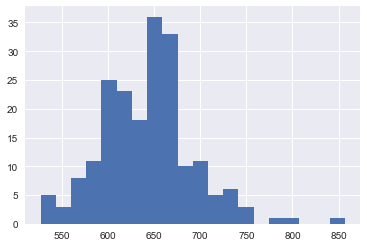

In [21]:
plt.hist(l2_norms, bins=20)
plt.show()

In [ ]:
plt.boxplot(l2_norms, notch=True, sym="o")
plt.show()

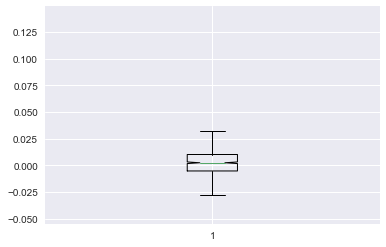

In [23]:
# EXPERIMENT 2: Shuffle weights, how does this affect reconstruction?
# layer_shuffle = copy.deepcopy(experiment.layer)

noise and network size:
    network size = [20-100, step=50 (or 100)]
    noise = [10 -- 50, step=5]

each presynaptic spike through synaptic waveform * 

In [ ]:
# EXPERIMENT 3: Sweep Tau = 30--50
NUM_TRIALS = 200

num_t = np.arange(0.0, t_stop, dt).shape[0]
inputs = np.empty((num_t, NUM_TRIALS))

for i in range(NUM_TRIALS):
    input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
    i_inj = 16.0 + 6.0*input_slow
    inputs[:,i] = i_inj.flatten()